# Forecast using STL

In [1]:
from Energy.HelpFunctions.get_energy_data import get_energy_data, prepare_data
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.seasonal import MSTL

df = get_energy_data()
df = prepare_data(df)

start_date = pd.to_datetime("2019-01-01")
end_date = pd.to_datetime("2023-12-31")

mask = (df.index >= start_date) & (df.index < end_date)
df = df[mask]

/Users/elias/Desktop/PTSFC/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from sktime.datasets import load_airline
from sktime.forecasting.statsforecast import StatsForecastMSTL

/Users/elias/Desktop/PTSFC/venv/lib/python3.9/site-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


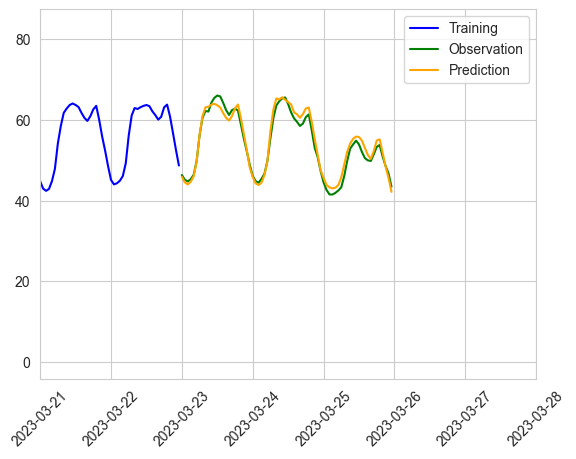

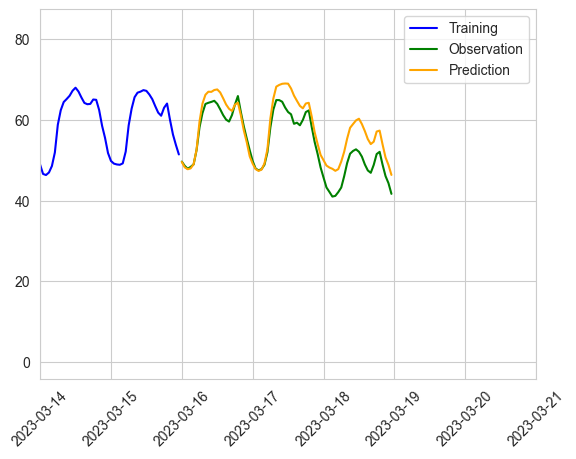

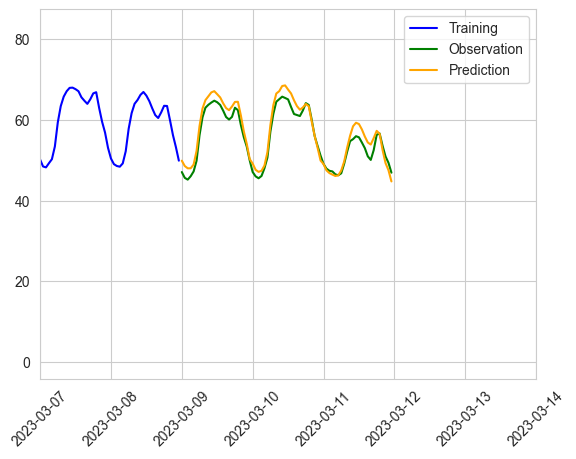

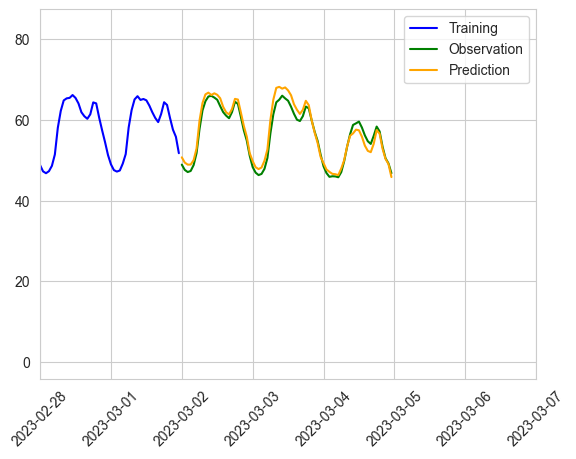

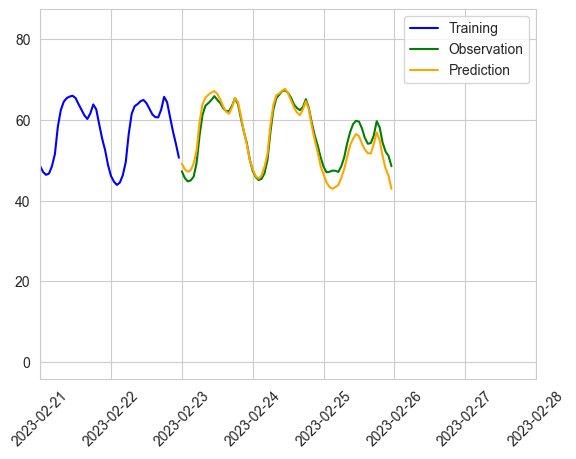

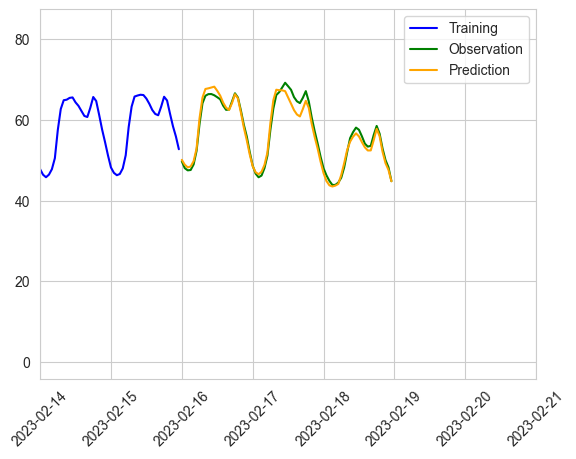

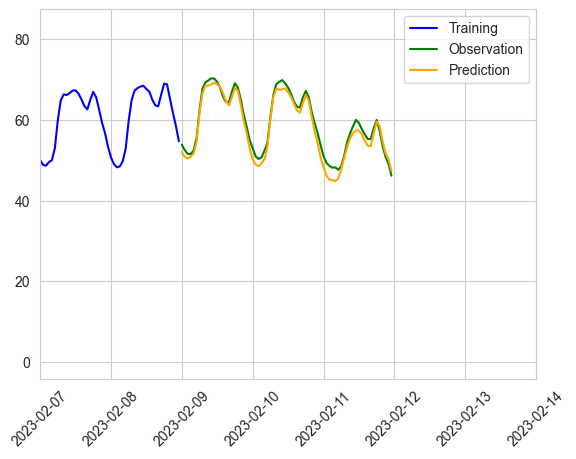

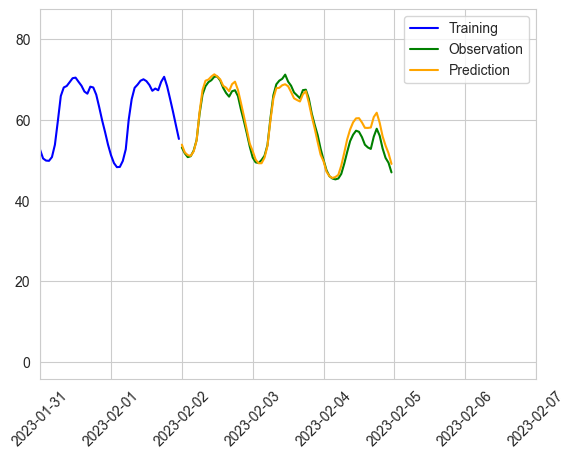

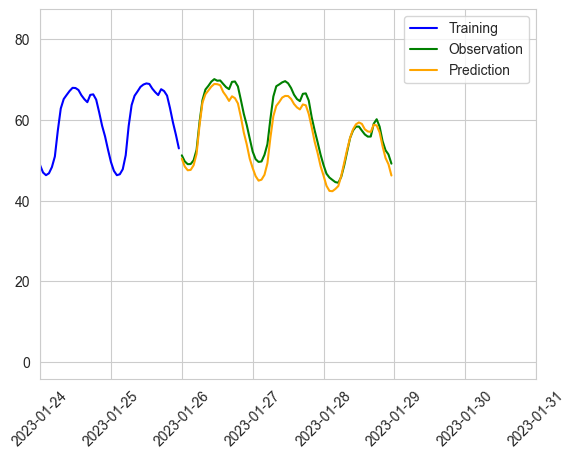

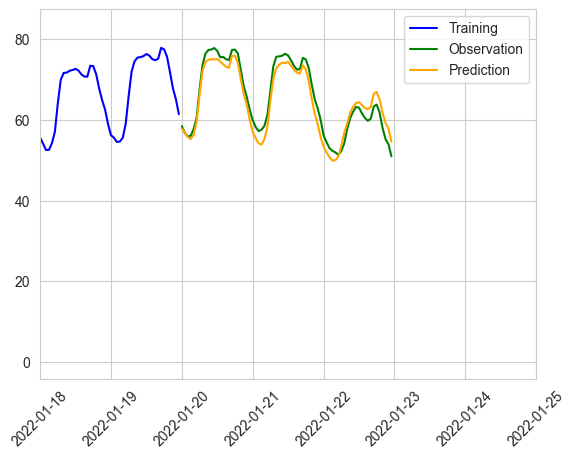

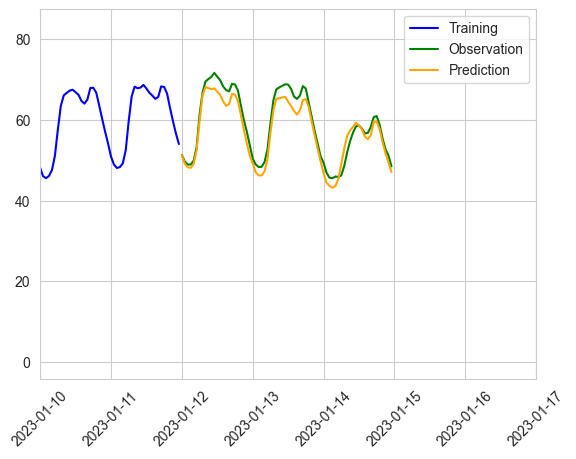

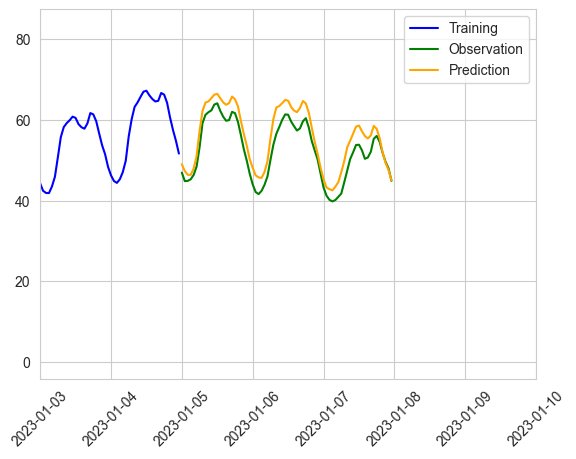

In [3]:
import pandas as pd
from datetime import timedelta

# Trainind Data start date
start_date = pd.to_datetime("2021-01-01")

# Define the thursdays (after the forecast wednesday). It will then be the end date of the training data
end_dates = ["2023-03-23","2023-03-16","2023-03-09","2023-03-02","2023-02-23","2023-02-16","2023-02-09","2023-02-02","2023-01-26","2022-01-20","2023-01-12","2023-01-05"]

residuals = []

for end_date in end_dates:
    end_date = pd.to_datetime(end_date)
    mask = (df.index >= start_date) & (df.index < end_date)
    y = df[mask]
    model = StatsForecastMSTL(season_length=[24,24*7]) 
    fitted_model = model.fit(y=y) 
    
    y_pred = fitted_model.predict(fh=[i for i in range(1,73)]) 
    
    
    start_date_obs = end_date
    end_date_obs = start_date_obs + timedelta(days=3)
    
    mask = (df.index >= start_date_obs) & (df.index < end_date_obs)
    obs = df[mask]
    
    
    import matplotlib.pyplot as plt
    # y.index = y.index.to_timestamp()
    plt.plot(y, color='blue', label='Training')
    
    plt.plot(obs, color='green', label='Observation')
    plt.plot(y_pred, color='orange', label='Prediction')
    plt.legend()
    plt.xticks(rotation=45)
    plt.xlim(pd.to_datetime(end_date-timedelta(days=2)),pd.to_datetime(end_date+timedelta(days=5)))
    plt.show()
    
    res = obs - y_pred
    
    residuals.append(res)
    
    


<Axes: ylabel='Density'>

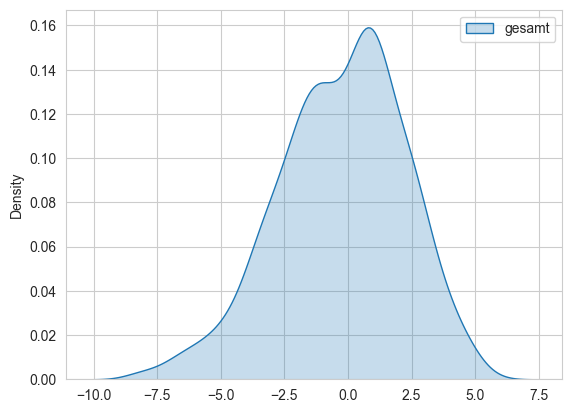

In [4]:
res_one_arr = pd.DataFrame()
for res in residuals:
    res_one_arr = pd.concat([res_one_arr, res])
# print(residuals_one_array)

sns.kdeplot(res_one_arr, fill=True)

In [5]:
print(res_one_arr.mean())
print(res_one_arr.var())

gesamt   -0.28221
dtype: float64
gesamt    6.167392
dtype: float64
